### Manipulation of Trans Proteomic Pipeline (TPP) Comet database search results of *Prochlorococus MED4* LC-MS/MS data using python.

Starting with: 

- Comet output (.xlxs and .csv) of PTM-optimized database searches, sorted by XCorr (descending)

Goal:

- Files with stripped (no PTMs or tryptic ends) peptide lists and
- Columns with #'s of each modification in every sequence
- Column with stripped peptide lengths (# amino acids)

For technical duplicates, I exported Comet search results as both Excel files and as CSVs into my ETNP 2017 git repo:

In [1]:
cd /home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/

/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP


In [2]:
ls

 RAL4_MED2_trypsin_1_PTMopt_Comet.csv
'RAL4_MED2_trypsin_1_PTMopt_Comet_stripped>2.5'
 RAL4_MED2_trypsin_1_PTMopt_Comet_stripped.csv
 RAL4_MED2_trypsin_1_PTMopt_Comet_stripped_work.ods
 RAL4_MED2_trypsin_1_PTMopt_Comet.xlsx
 RAL4_MED2_trypsin_1_PTMopt_PepProp90.csv
 RAL4_MED2_trypsin_1_PTMopt_PepProp90_stripped.csv
 RAL4_MED2_trypsin_1_PTMopt_PepProp90_stripped_peptides
 RAL4_MED2_trypsin_1_PTMopt_PepProp90.xlsx
 RAL4_MED2_trypsin_2_PTMopt_Comet.csv
'RAL4_MED2_trypsin_2_PTMopt_Comet_stripped>2.5.csv'
 RAL4_MED2_trypsin_2_PTMopt_Comet_stripped.csv
 RAL4_MED2_trypsin_2_PTMopt_Comet_stripped_work.ods
 RAL4_MED2_trypsin_2_PTMopt_Comet.xlsx
 RAL4_MED2_trypsin_2_PTMopt_PepProp90.csv
 RAL4_MED2_trypsin_2_PTMopt_PepProp90_stripped.csv
 RAL4_MED2_trypsin_2_PTMopt_PepProp90_stripped_peptides
 RAL4_MED2_trypsin_2_PTMopt_PepProp90.xlsx


In [27]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import pyplot
import seaborn as sns
from scipy.stats import kde
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [4]:
#read the CSV into a datadrame we name 'comet' using the pandas read_csv function
comet = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL4_MED2_trypsin_1_PTMopt_Comet.csv")


#look at the dataframe
comet.head()

,spectrum,xcorr,deltacn,expect,ions,peptide,protein,calc_neutral_pep_mass
0,022016_RAL4_95_MED2_trypsin_1.41211.41211.4,8.768,1,1.42E-09,22/156,K.LFADENHLSPAVTAIQIEDIDAEQFRK.N,PMM0035,3069.5407
1,022016_RAL4_95_MED2_trypsin_1.32793.32793.4,8.578,1,9.31E-10,18/204,K.LAIDDSSIN[115.03]LDQVDYIN[115.03]AHGTSTTANDK...,PMM1609,3735.7599
2,022016_RAL4_95_MED2_trypsin_1.50751.50751.4,8.469,0.646,3.43E-14,24/156,R.SGLQNAASIAGM[147.04]VLTTEC[160.03]IVADLPEKK.D,PMM1436,2831.4409
3,022016_RAL4_95_MED2_trypsin_1.31065.31065.3,8.061,0.561,2.18E-11,17/92,K.IDIEDGGIVTIASHDGAAAEEAQK.I,PMM1191,2409.166
4,022016_RAL4_95_MED2_trypsin_1.50278.50278.4,7.949,0.584,3.02E-09,23/156,R.SGLQNAASIAGM[147.04]VLTTEC[160.03]IVADLPEKK.D,PMM1436,2831.4409


The peptide column has the residues before and after the tryptic terminii as well as masses of modified residues (e.g., 160.03 Da for carbamidomethylated cysteine). We want to make new columns with all that information and make a column with only the 'stripped' peptide sequence that's just amino acids - this we can then align against other sequences, for example. 

Modified residues were allowed for:

- fixed carbamodimethylation of cysteine 57.021464 C
- varialbe oxidation of methionine: 15.9949 M
- variable deamidation of asparagine, glumatine: 0.984016 NQ
- variable iron cation on lysine: 54.010565 K
- variable methylation of lysine and arginine: 14.015650 KR

We'll then write this manipulated dataframe to a new file.

In [5]:
# get rid of rows where the xcorr is unavailable (usually 3 or so)
comet = comet[comet.xcorr != '[unavailable]']

# use str.strip with indexing by str[0] to add a column with the peptide's left terminus
comet['L terminus'] = comet['peptide'].astype(str).str[0]

# use str.strip with indexing by str[-1] to add a column with the peptide's left terminus
comet['R terminus'] = comet['peptide'].str.strip().str[-1]

# use a count function to enumerate the # of ccarbamidomethylated C's in each peptide
comet['c-carb'] = comet['peptide'].str.count("160.03")

# use a count function to enumerate the # of oxidized M's in each peptide
comet['m-oxid'] = comet['peptide'].str.count("147.04")

# use a count function to enumerate the # of deamidated N's in each peptide
comet['n-deam'] = comet['peptide'].str.count("115.03")

# use a count function to enumerate the # of deamidated Q's in each peptide
comet['q-deam'] = comet['peptide'].str.count("129.04")

# use a count function to enumerate the # of iron adducted K's in each peptide
comet['k-iron'] = comet['peptide'].str.count("182.11")

# use a count function to enumerate the # of methylated K's in each peptide
comet['k-meth'] = comet['peptide'].str.count("142.11")

# use a count function to enumerate the # of methylated R's in each peptide
comet['r-meth'] = comet['peptide'].str.count("170.12")

# create a column with 'stripped' peptide sequences using strip
comet['stripped peptide'] = comet['peptide'].str[2:].str[:-2].str.replace(r"\[.*\]","")

# add a column with the stripped peptide length (number of AAs)
comet['stripped length'] = comet['stripped peptide'].apply(len)

# total the number of modifications in sequence
comet['ptm-total'] = comet['c-carb'] + comet['m-oxid'] + comet['n-deam'] + comet['q-deam'] + comet['k-iron'] + comet['k-meth'] + comet['r-meth']

# total the number of modifications in sequence relative to # of AAs
comet['ptm-norm'] = comet['ptm-total'] / comet['stripped length']

# write modified dataframe to new txt file, same name + 'stripped'
comet.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL4_MED2_trypsin_1_PTMopt_Comet_stripped.csv")


# check out the results
comet.head(20)

,spectrum,xcorr,deltacn,expect,ions,peptide,protein,calc_neutral_pep_mass,L terminus,R terminus,...,m-oxid,n-deam,q-deam,k-iron,k-meth,r-meth,stripped peptide,stripped length,ptm-total,ptm-norm
0,022016_RAL4_95_MED2_trypsin_1.41211.41211.4,8.768,1,1.42E-09,22/156,K.LFADENHLSPAVTAIQIEDIDAEQFRK.N,PMM0035,3069.5407,K,N,...,0,0,0,0,0,0,LFADENHLSPAVTAIQIEDIDAEQFRK,27,0,0.000000
1,022016_RAL4_95_MED2_trypsin_1.32793.32793.4,8.578,1,9.31E-10,18/204,K.LAIDDSSIN[115.03]LDQVDYIN[115.03]AHGTSTTANDK...,PMM1609,3735.7599,K,S,...,0,2,0,0,0,0,LAIDDSSINAHGTSTTANDKNETSAIK,27,2,0.074074
2,022016_RAL4_95_MED2_trypsin_1.50751.50751.4,8.469,0.646,3.43E-14,24/156,R.SGLQNAASIAGM[147.04]VLTTEC[160.03]IVADLPEKK.D,PMM1436,2831.4409,R,D,...,1,0,0,0,0,0,SGLQNAASIAGMIVADLPEKK,21,2,0.095238
3,022016_RAL4_95_MED2_trypsin_1.31065.31065.3,8.061,0.561,2.18E-11,17/92,K.IDIEDGGIVTIASHDGAAAEEAQK.I,PMM1191,2409.166,K,I,...,0,0,0,0,0,0,IDIEDGGIVTIASHDGAAAEEAQK,24,0,0.000000
4,022016_RAL4_95_MED2_trypsin_1.50278.50278.4,7.949,0.584,3.02E-09,23/156,R.SGLQNAASIAGM[147.04]VLTTEC[160.03]IVADLPEKK.D,PMM1436,2831.4409,R,D,...,1,0,0,0,0,0,SGLQNAASIAGMIVADLPEKK,21,2,0.095238
5,022016_RAL4_95_MED2_trypsin_1.26579.26579.3,7.813,0.516,2.22E-05,18/68,R.DKGSLVLLDAC[160.03]QSLAHQK.L,PMM0070,1982.0255,R,L,...,0,0,0,0,0,0,DKGSLVLLDACQSLAHQK,18,1,0.055556
6,022016_RAL4_95_MED2_trypsin_1.50978.50978.4,7.753,0.597,1.82E-08,21/156,R.SGLQNAASIAGM[147.04]VLTTEC[160.03]IVADLPEKK.D,PMM1436,2831.4409,R,D,...,1,0,0,0,0,0,SGLQNAASIAGMIVADLPEKK,21,2,0.095238
7,022016_RAL4_95_MED2_trypsin_1.61470.61470.4,7.744,0.529,1.13E-09,18/156,R.SGLQNAASIAGMVLTTEC[160.03]IVADLPEKK.D,PMM1436,2815.446,R,D,...,0,0,0,0,0,0,SGLQNAASIAGMVLTTECIVADLPEKK,27,1,0.037037
8,022016_RAL4_95_MED2_trypsin_1.61687.61687.4,7.673,0.61,1.77E-11,23/156,R.SGLQNAASIAGMVLTTEC[160.03]IVADLPEKK.D,PMM1436,2815.446,R,D,...,0,0,0,0,0,0,SGLQNAASIAGMVLTTECIVADLPEKK,27,1,0.037037
9,022016_RAL4_95_MED2_trypsin_1.31081.31081.2,7.56,0.629,3.14E-12,15/46,K.IDIEDGGIVTIASHDGAAAEEAQK.I,PMM1191,2409.166,K,I,...,0,0,0,0,0,0,IDIEDGGIVTIASHDGAAAEEAQK,24,0,0.000000


In [6]:
print("Max Xcorr: ", comet['xcorr'].max())
print("Min Xcorr: ", comet['xcorr'].min())

Max Xcorr:  8.768
Min Xcorr:  0.002


In [7]:
# need to convert Xcorr column from strings to numeric so we can bin 
comet['xcorr'] = pd.to_numeric(comet['xcorr'])

# making evenly spaced bins for the Xcorr data based on the min and max, called above
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9]
labels = ['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3', '3-3.5', '3.5-4', '4-4.5', '4.5-5', '5-5.5', '5.5-6', '6-6.5', '6.5-7', '7-7.5', '7.5-8', '8-8.5', '8.5-9']

# use pandas cut function to do the binning itself
comet['binned'] = pd.cut(comet['xcorr'], bins=bins, labels=labels)


comet.head()

,spectrum,xcorr,deltacn,expect,ions,peptide,protein,calc_neutral_pep_mass,L terminus,R terminus,...,n-deam,q-deam,k-iron,k-meth,r-meth,stripped peptide,stripped length,ptm-total,ptm-norm,binned
0,022016_RAL4_95_MED2_trypsin_1.41211.41211.4,8.768,1,1.42E-09,22/156,K.LFADENHLSPAVTAIQIEDIDAEQFRK.N,PMM0035,3069.5407,K,N,...,0,0,0,0,0,LFADENHLSPAVTAIQIEDIDAEQFRK,27,0,0.000000,8.5-9
1,022016_RAL4_95_MED2_trypsin_1.32793.32793.4,8.578,1,9.31E-10,18/204,K.LAIDDSSIN[115.03]LDQVDYIN[115.03]AHGTSTTANDK...,PMM1609,3735.7599,K,S,...,2,0,0,0,0,LAIDDSSINAHGTSTTANDKNETSAIK,27,2,0.074074,8.5-9
2,022016_RAL4_95_MED2_trypsin_1.50751.50751.4,8.469,0.646,3.43E-14,24/156,R.SGLQNAASIAGM[147.04]VLTTEC[160.03]IVADLPEKK.D,PMM1436,2831.4409,R,D,...,0,0,0,0,0,SGLQNAASIAGMIVADLPEKK,21,2,0.095238,8-8.5
3,022016_RAL4_95_MED2_trypsin_1.31065.31065.3,8.061,0.561,2.18E-11,17/92,K.IDIEDGGIVTIASHDGAAAEEAQK.I,PMM1191,2409.166,K,I,...,0,0,0,0,0,IDIEDGGIVTIASHDGAAAEEAQK,24,0,0.000000,8-8.5
4,022016_RAL4_95_MED2_trypsin_1.50278.50278.4,7.949,0.584,3.02E-09,23/156,R.SGLQNAASIAGM[147.04]VLTTEC[160.03]IVADLPEKK.D,PMM1436,2831.4409,R,D,...,0,0,0,0,0,SGLQNAASIAGMIVADLPEKK,21,2,0.095238,7.5-8


       Total PTMs  Cys carb.  Met oxi.  Asp deam.  Glut deam.  Lys iron  \
0-0.5         564         84       100        137          42        75   
0.5-1        3216        380       397        849         377       518   
1-1.5        4465        485       514       1242         545       730   
1.5-2        4104        355       460       1139         546       747   
2-2.5        2758        214       291        785         365       495   
2.5-3        4003        682       423       1061         529       694   
3-3.5        1926        616       261        446         256       192   
3.5-4        1146        508       176        244         126        48   
4-4.5         732        343       135        159          81        11   
4.5-5         446        218        86         81          57         3   
5-5.5         225         90        46         59          30         0   
5.5-6         108         49        26         22          11         0   
6-6.5          64        

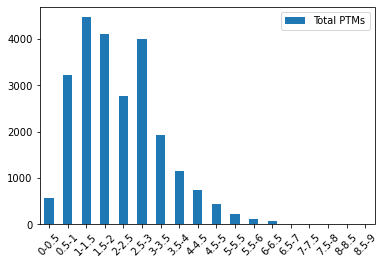

In [8]:
# plotting histograms of PTMs using matplotlib

index = ['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3', '3-3.5', '3.5-4', '4-4.5', '4.5-5', '5-5.5', '5.5-6', '6-6.5', '6.5-7', '7-7.5', '7.5-8', '8-8.5', '8.5-9']
data = {'Total PTMs': [comet.groupby('binned')['ptm-total'].sum()['0-0.5'], comet.groupby('binned')['ptm-total'].sum()['0.5-1'], comet.groupby('binned')['ptm-total'].sum()['1-1.5'], comet.groupby('binned')['ptm-total'].sum()['1.5-2'], comet.groupby('binned')['ptm-total'].sum()['2-2.5'], comet.groupby('binned')['ptm-total'].sum()['2.5-3'], comet.groupby('binned')['ptm-total'].sum()['3-3.5'], comet.groupby('binned')['ptm-total'].sum()['3.5-4'], comet.groupby('binned')['ptm-total'].sum()['4-4.5'], comet.groupby('binned')['ptm-total'].sum()['4.5-5'], comet.groupby('binned')['ptm-total'].sum()['5-5.5'], comet.groupby('binned')['ptm-total'].sum()['5.5-6'], comet.groupby('binned')['ptm-total'].sum()['6-6.5'], comet.groupby('binned')['ptm-total'].sum()['6.5-7'], comet.groupby('binned')['ptm-total'].sum()['7-7.5'], comet.groupby('binned')['ptm-total'].sum()['7.5-8'], comet.groupby('binned')['ptm-total'].sum()['8-8.5'], comet.groupby('binned')['ptm-total'].sum()['8.5-9']],
        'Cys carb.': [comet.groupby('binned')['c-carb'].sum()['0-0.5'], comet.groupby('binned')['c-carb'].sum()['0.5-1'], comet.groupby('binned')['c-carb'].sum()['1-1.5'], comet.groupby('binned')['c-carb'].sum()['1.5-2'], comet.groupby('binned')['c-carb'].sum()['2-2.5'], comet.groupby('binned')['c-carb'].sum()['2.5-3'], comet.groupby('binned')['c-carb'].sum()['3-3.5'], comet.groupby('binned')['c-carb'].sum()['3.5-4'], comet.groupby('binned')['c-carb'].sum()['4-4.5'], comet.groupby('binned')['c-carb'].sum()['4.5-5'], comet.groupby('binned')['c-carb'].sum()['5-5.5'], comet.groupby('binned')['c-carb'].sum()['5.5-6'], comet.groupby('binned')['c-carb'].sum()['6-6.5'], comet.groupby('binned')['c-carb'].sum()['6.5-7'], comet.groupby('binned')['c-carb'].sum()['7-7.5'], comet.groupby('binned')['c-carb'].sum()['7.5-8'], comet.groupby('binned')['c-carb'].sum()['8-8.5'], comet.groupby('binned')['c-carb'].sum()['8.5-9']],
        'Met oxi.': [comet.groupby('binned')['m-oxid'].sum()['0-0.5'], comet.groupby('binned')['m-oxid'].sum()['0.5-1'], comet.groupby('binned')['m-oxid'].sum()['1-1.5'], comet.groupby('binned')['m-oxid'].sum()['1.5-2'], comet.groupby('binned')['m-oxid'].sum()['2-2.5'], comet.groupby('binned')['m-oxid'].sum()['2.5-3'], comet.groupby('binned')['m-oxid'].sum()['3-3.5'], comet.groupby('binned')['m-oxid'].sum()['3.5-4'], comet.groupby('binned')['m-oxid'].sum()['4-4.5'], comet.groupby('binned')['m-oxid'].sum()['4.5-5'], comet.groupby('binned')['m-oxid'].sum()['5-5.5'], comet.groupby('binned')['m-oxid'].sum()['5.5-6'], comet.groupby('binned')['m-oxid'].sum()['6-6.5'], comet.groupby('binned')['m-oxid'].sum()['6.5-7'], comet.groupby('binned')['m-oxid'].sum()['7-7.5'], comet.groupby('binned')['m-oxid'].sum()['7.5-8'], comet.groupby('binned')['m-oxid'].sum()['8-8.5'], comet.groupby('binned')['m-oxid'].sum()['8.5-9']],
        'Asp deam.': [comet.groupby('binned')['n-deam'].sum()['0-0.5'], comet.groupby('binned')['n-deam'].sum()['0.5-1'], comet.groupby('binned')['n-deam'].sum()['1-1.5'], comet.groupby('binned')['n-deam'].sum()['1.5-2'], comet.groupby('binned')['n-deam'].sum()['2-2.5'], comet.groupby('binned')['n-deam'].sum()['2.5-3'], comet.groupby('binned')['n-deam'].sum()['3-3.5'], comet.groupby('binned')['n-deam'].sum()['3.5-4'], comet.groupby('binned')['n-deam'].sum()['4-4.5'], comet.groupby('binned')['n-deam'].sum()['4.5-5'], comet.groupby('binned')['n-deam'].sum()['5-5.5'], comet.groupby('binned')['n-deam'].sum()['5.5-6'], comet.groupby('binned')['n-deam'].sum()['6-6.5'], comet.groupby('binned')['n-deam'].sum()['6.5-7'], comet.groupby('binned')['n-deam'].sum()['7-7.5'], comet.groupby('binned')['n-deam'].sum()['7.5-8'], comet.groupby('binned')['n-deam'].sum()['8-8.5'], comet.groupby('binned')['n-deam'].sum()['8.5-9']],
        'Glut deam.': [comet.groupby('binned')['q-deam'].sum()['0-0.5'], comet.groupby('binned')['q-deam'].sum()['0.5-1'], comet.groupby('binned')['q-deam'].sum()['1-1.5'], comet.groupby('binned')['q-deam'].sum()['1.5-2'], comet.groupby('binned')['q-deam'].sum()['2-2.5'], comet.groupby('binned')['q-deam'].sum()['2.5-3'], comet.groupby('binned')['q-deam'].sum()['3-3.5'], comet.groupby('binned')['q-deam'].sum()['3.5-4'], comet.groupby('binned')['q-deam'].sum()['4-4.5'], comet.groupby('binned')['q-deam'].sum()['4.5-5'], comet.groupby('binned')['q-deam'].sum()['5-5.5'], comet.groupby('binned')['q-deam'].sum()['5.5-6'], comet.groupby('binned')['q-deam'].sum()['6-6.5'], comet.groupby('binned')['q-deam'].sum()['6.5-7'], comet.groupby('binned')['q-deam'].sum()['7-7.5'], comet.groupby('binned')['q-deam'].sum()['7.5-8'], comet.groupby('binned')['q-deam'].sum()['8-8.5'], comet.groupby('binned')['q-deam'].sum()['8.5-9']],
        'Lys iron': [comet.groupby('binned')['k-iron'].sum()['0-0.5'], comet.groupby('binned')['k-iron'].sum()['0.5-1'], comet.groupby('binned')['k-iron'].sum()['1-1.5'], comet.groupby('binned')['k-iron'].sum()['1.5-2'], comet.groupby('binned')['k-iron'].sum()['2-2.5'], comet.groupby('binned')['k-iron'].sum()['2.5-3'], comet.groupby('binned')['k-iron'].sum()['3-3.5'], comet.groupby('binned')['k-iron'].sum()['3.5-4'], comet.groupby('binned')['k-iron'].sum()['4-4.5'], comet.groupby('binned')['k-iron'].sum()['4.5-5'], comet.groupby('binned')['k-iron'].sum()['5-5.5'], comet.groupby('binned')['k-iron'].sum()['5.5-6'], comet.groupby('binned')['k-iron'].sum()['6-6.5'], comet.groupby('binned')['k-iron'].sum()['6.5-7'], comet.groupby('binned')['k-iron'].sum()['7-7.5'], comet.groupby('binned')['k-iron'].sum()['7.5-8'], comet.groupby('binned')['k-iron'].sum()['8-8.5'], comet.groupby('binned')['k-iron'].sum()['8.5-9']],
        'Lys meth.': [comet.groupby('binned')['k-meth'].sum()['0-0.5'], comet.groupby('binned')['k-meth'].sum()['0.5-1'], comet.groupby('binned')['k-meth'].sum()['1-1.5'], comet.groupby('binned')['k-meth'].sum()['1.5-2'], comet.groupby('binned')['k-meth'].sum()['2-2.5'], comet.groupby('binned')['k-meth'].sum()['2.5-3'], comet.groupby('binned')['k-meth'].sum()['3-3.5'], comet.groupby('binned')['k-meth'].sum()['3.5-4'], comet.groupby('binned')['k-meth'].sum()['4-4.5'], comet.groupby('binned')['k-meth'].sum()['4.5-5'], comet.groupby('binned')['k-meth'].sum()['5-5.5'], comet.groupby('binned')['k-meth'].sum()['5.5-6'], comet.groupby('binned')['k-meth'].sum()['6-6.5'], comet.groupby('binned')['k-meth'].sum()['6.5-7'], comet.groupby('binned')['k-meth'].sum()['7-7.5'], comet.groupby('binned')['k-meth'].sum()['7.5-8'], comet.groupby('binned')['k-meth'].sum()['8-8.5'], comet.groupby('binned')['k-meth'].sum()['8.5-9']],
        'Arg meth.': [comet.groupby('binned')['r-meth'].sum()['0-0.5'], comet.groupby('binned')['r-meth'].sum()['0.5-1'], comet.groupby('binned')['r-meth'].sum()['1-1.5'], comet.groupby('binned')['r-meth'].sum()['1.5-2'], comet.groupby('binned')['r-meth'].sum()['2-2.5'], comet.groupby('binned')['r-meth'].sum()['2.5-3'], comet.groupby('binned')['r-meth'].sum()['3-3.5'], comet.groupby('binned')['r-meth'].sum()['3.5-4'], comet.groupby('binned')['r-meth'].sum()['4-4.5'], comet.groupby('binned')['r-meth'].sum()['4.5-5'], comet.groupby('binned')['r-meth'].sum()['5-5.5'], comet.groupby('binned')['r-meth'].sum()['5.5-6'], comet.groupby('binned')['r-meth'].sum()['6-6.5'], comet.groupby('binned')['r-meth'].sum()['6.5-7'], comet.groupby('binned')['r-meth'].sum()['7-7.5'], comet.groupby('binned')['r-meth'].sum()['7.5-8'], comet.groupby('binned')['r-meth'].sum()['8-8.5'], comet.groupby('binned')['r-meth'].sum()['8.5-9']]
        }

cometbin = pd.DataFrame(data, columns=['Total PTMs','Cys carb.','Met oxi.','Asp deam.', 'Glut deam.', 'Lys iron', 'Lys meth.', 'Arg meth.'], index=index)
print (cometbin)
plt = cometbin.plot.bar(y='Total PTMs', rot=45)
plt

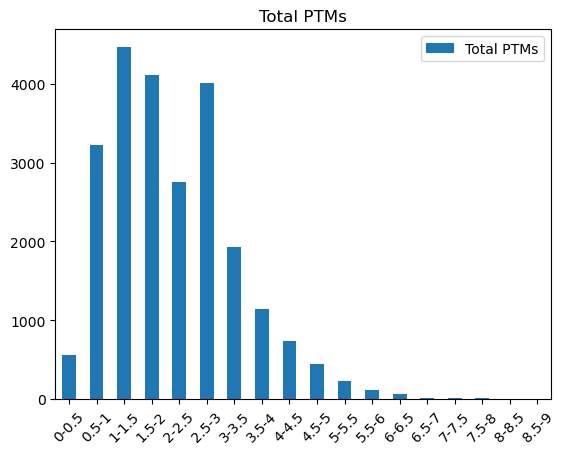

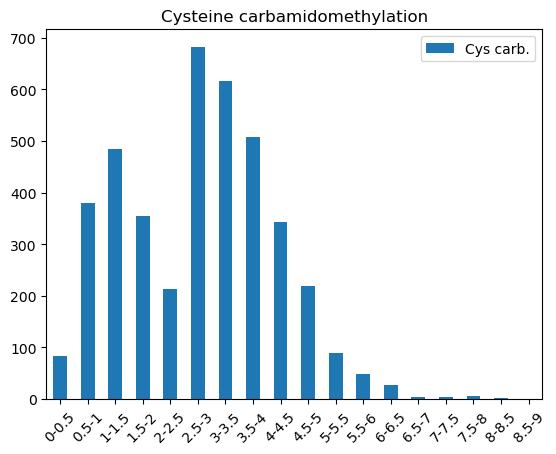

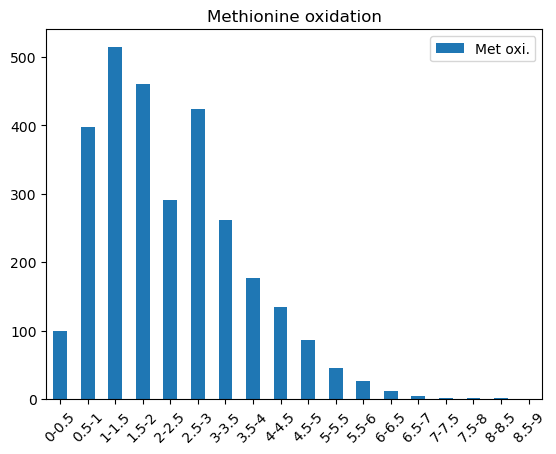

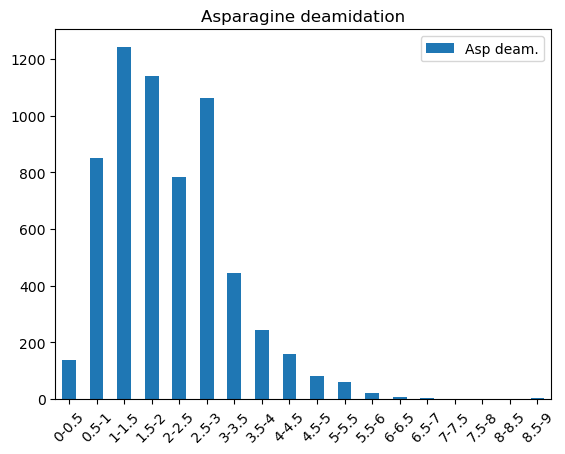

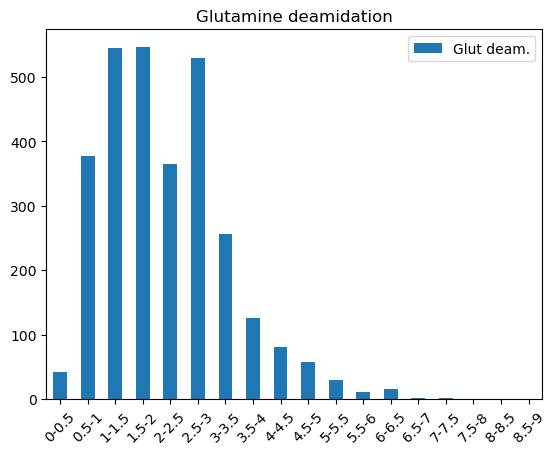

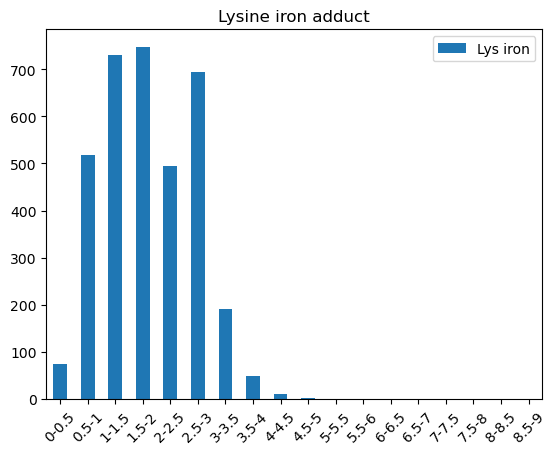

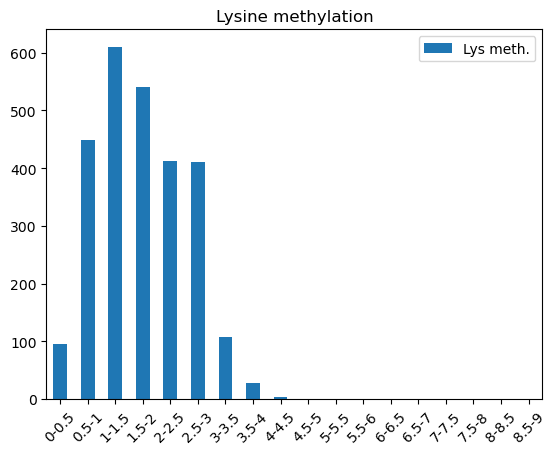

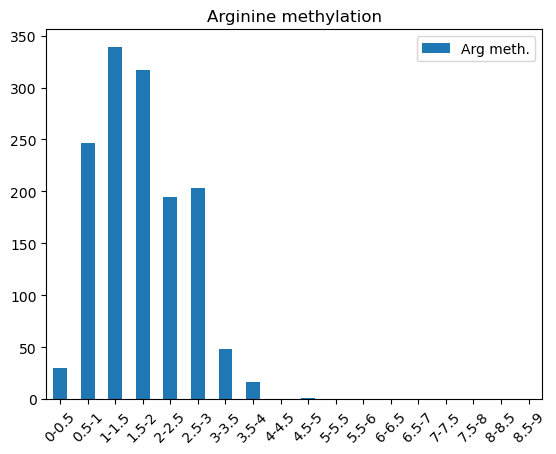

In [32]:
# bar plots of binned PTM data

index = ['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3', '3-3.5', '3.5-4', '4-4.5', '4.5-5', '5-5.5', '5.5-6', '6-6.5', '6.5-7', '7-7.5', '7.5-8', '8-8.5', '8.5-9']
data = {'Total PTMs': [comet.groupby('binned')['ptm-total'].sum()['0-0.5'], comet.groupby('binned')['ptm-total'].sum()['0.5-1'], comet.groupby('binned')['ptm-total'].sum()['1-1.5'], comet.groupby('binned')['ptm-total'].sum()['1.5-2'], comet.groupby('binned')['ptm-total'].sum()['2-2.5'], comet.groupby('binned')['ptm-total'].sum()['2.5-3'], comet.groupby('binned')['ptm-total'].sum()['3-3.5'], comet.groupby('binned')['ptm-total'].sum()['3.5-4'], comet.groupby('binned')['ptm-total'].sum()['4-4.5'], comet.groupby('binned')['ptm-total'].sum()['4.5-5'], comet.groupby('binned')['ptm-total'].sum()['5-5.5'], comet.groupby('binned')['ptm-total'].sum()['5.5-6'], comet.groupby('binned')['ptm-total'].sum()['6-6.5'], comet.groupby('binned')['ptm-total'].sum()['6.5-7'], comet.groupby('binned')['ptm-total'].sum()['7-7.5'], comet.groupby('binned')['ptm-total'].sum()['7.5-8'], comet.groupby('binned')['ptm-total'].sum()['8-8.5'], comet.groupby('binned')['ptm-total'].sum()['8.5-9']],
        'Cys carb.': [comet.groupby('binned')['c-carb'].sum()['0-0.5'], comet.groupby('binned')['c-carb'].sum()['0.5-1'], comet.groupby('binned')['c-carb'].sum()['1-1.5'], comet.groupby('binned')['c-carb'].sum()['1.5-2'], comet.groupby('binned')['c-carb'].sum()['2-2.5'], comet.groupby('binned')['c-carb'].sum()['2.5-3'], comet.groupby('binned')['c-carb'].sum()['3-3.5'], comet.groupby('binned')['c-carb'].sum()['3.5-4'], comet.groupby('binned')['c-carb'].sum()['4-4.5'], comet.groupby('binned')['c-carb'].sum()['4.5-5'], comet.groupby('binned')['c-carb'].sum()['5-5.5'], comet.groupby('binned')['c-carb'].sum()['5.5-6'], comet.groupby('binned')['c-carb'].sum()['6-6.5'], comet.groupby('binned')['c-carb'].sum()['6.5-7'], comet.groupby('binned')['c-carb'].sum()['7-7.5'], comet.groupby('binned')['c-carb'].sum()['7.5-8'], comet.groupby('binned')['c-carb'].sum()['8-8.5'], comet.groupby('binned')['c-carb'].sum()['8.5-9']],
        'Met oxi.': [comet.groupby('binned')['m-oxid'].sum()['0-0.5'], comet.groupby('binned')['m-oxid'].sum()['0.5-1'], comet.groupby('binned')['m-oxid'].sum()['1-1.5'], comet.groupby('binned')['m-oxid'].sum()['1.5-2'], comet.groupby('binned')['m-oxid'].sum()['2-2.5'], comet.groupby('binned')['m-oxid'].sum()['2.5-3'], comet.groupby('binned')['m-oxid'].sum()['3-3.5'], comet.groupby('binned')['m-oxid'].sum()['3.5-4'], comet.groupby('binned')['m-oxid'].sum()['4-4.5'], comet.groupby('binned')['m-oxid'].sum()['4.5-5'], comet.groupby('binned')['m-oxid'].sum()['5-5.5'], comet.groupby('binned')['m-oxid'].sum()['5.5-6'], comet.groupby('binned')['m-oxid'].sum()['6-6.5'], comet.groupby('binned')['m-oxid'].sum()['6.5-7'], comet.groupby('binned')['m-oxid'].sum()['7-7.5'], comet.groupby('binned')['m-oxid'].sum()['7.5-8'], comet.groupby('binned')['m-oxid'].sum()['8-8.5'], comet.groupby('binned')['m-oxid'].sum()['8.5-9']],
        'Asp deam.': [comet.groupby('binned')['n-deam'].sum()['0-0.5'], comet.groupby('binned')['n-deam'].sum()['0.5-1'], comet.groupby('binned')['n-deam'].sum()['1-1.5'], comet.groupby('binned')['n-deam'].sum()['1.5-2'], comet.groupby('binned')['n-deam'].sum()['2-2.5'], comet.groupby('binned')['n-deam'].sum()['2.5-3'], comet.groupby('binned')['n-deam'].sum()['3-3.5'], comet.groupby('binned')['n-deam'].sum()['3.5-4'], comet.groupby('binned')['n-deam'].sum()['4-4.5'], comet.groupby('binned')['n-deam'].sum()['4.5-5'], comet.groupby('binned')['n-deam'].sum()['5-5.5'], comet.groupby('binned')['n-deam'].sum()['5.5-6'], comet.groupby('binned')['n-deam'].sum()['6-6.5'], comet.groupby('binned')['n-deam'].sum()['6.5-7'], comet.groupby('binned')['n-deam'].sum()['7-7.5'], comet.groupby('binned')['n-deam'].sum()['7.5-8'], comet.groupby('binned')['n-deam'].sum()['8-8.5'], comet.groupby('binned')['n-deam'].sum()['8.5-9']],
        'Glut deam.': [comet.groupby('binned')['q-deam'].sum()['0-0.5'], comet.groupby('binned')['q-deam'].sum()['0.5-1'], comet.groupby('binned')['q-deam'].sum()['1-1.5'], comet.groupby('binned')['q-deam'].sum()['1.5-2'], comet.groupby('binned')['q-deam'].sum()['2-2.5'], comet.groupby('binned')['q-deam'].sum()['2.5-3'], comet.groupby('binned')['q-deam'].sum()['3-3.5'], comet.groupby('binned')['q-deam'].sum()['3.5-4'], comet.groupby('binned')['q-deam'].sum()['4-4.5'], comet.groupby('binned')['q-deam'].sum()['4.5-5'], comet.groupby('binned')['q-deam'].sum()['5-5.5'], comet.groupby('binned')['q-deam'].sum()['5.5-6'], comet.groupby('binned')['q-deam'].sum()['6-6.5'], comet.groupby('binned')['q-deam'].sum()['6.5-7'], comet.groupby('binned')['q-deam'].sum()['7-7.5'], comet.groupby('binned')['q-deam'].sum()['7.5-8'], comet.groupby('binned')['q-deam'].sum()['8-8.5'], comet.groupby('binned')['q-deam'].sum()['8.5-9']],
        'Lys iron': [comet.groupby('binned')['k-iron'].sum()['0-0.5'], comet.groupby('binned')['k-iron'].sum()['0.5-1'], comet.groupby('binned')['k-iron'].sum()['1-1.5'], comet.groupby('binned')['k-iron'].sum()['1.5-2'], comet.groupby('binned')['k-iron'].sum()['2-2.5'], comet.groupby('binned')['k-iron'].sum()['2.5-3'], comet.groupby('binned')['k-iron'].sum()['3-3.5'], comet.groupby('binned')['k-iron'].sum()['3.5-4'], comet.groupby('binned')['k-iron'].sum()['4-4.5'], comet.groupby('binned')['k-iron'].sum()['4.5-5'], comet.groupby('binned')['k-iron'].sum()['5-5.5'], comet.groupby('binned')['k-iron'].sum()['5.5-6'], comet.groupby('binned')['k-iron'].sum()['6-6.5'], comet.groupby('binned')['k-iron'].sum()['6.5-7'], comet.groupby('binned')['k-iron'].sum()['7-7.5'], comet.groupby('binned')['k-iron'].sum()['7.5-8'], comet.groupby('binned')['k-iron'].sum()['8-8.5'], comet.groupby('binned')['k-iron'].sum()['8.5-9']],
        'Lys meth.': [comet.groupby('binned')['k-meth'].sum()['0-0.5'], comet.groupby('binned')['k-meth'].sum()['0.5-1'], comet.groupby('binned')['k-meth'].sum()['1-1.5'], comet.groupby('binned')['k-meth'].sum()['1.5-2'], comet.groupby('binned')['k-meth'].sum()['2-2.5'], comet.groupby('binned')['k-meth'].sum()['2.5-3'], comet.groupby('binned')['k-meth'].sum()['3-3.5'], comet.groupby('binned')['k-meth'].sum()['3.5-4'], comet.groupby('binned')['k-meth'].sum()['4-4.5'], comet.groupby('binned')['k-meth'].sum()['4.5-5'], comet.groupby('binned')['k-meth'].sum()['5-5.5'], comet.groupby('binned')['k-meth'].sum()['5.5-6'], comet.groupby('binned')['k-meth'].sum()['6-6.5'], comet.groupby('binned')['k-meth'].sum()['6.5-7'], comet.groupby('binned')['k-meth'].sum()['7-7.5'], comet.groupby('binned')['k-meth'].sum()['7.5-8'], comet.groupby('binned')['k-meth'].sum()['8-8.5'], comet.groupby('binned')['k-meth'].sum()['8.5-9']],
        'Arg meth.': [comet.groupby('binned')['r-meth'].sum()['0-0.5'], comet.groupby('binned')['r-meth'].sum()['0.5-1'], comet.groupby('binned')['r-meth'].sum()['1-1.5'], comet.groupby('binned')['r-meth'].sum()['1.5-2'], comet.groupby('binned')['r-meth'].sum()['2-2.5'], comet.groupby('binned')['r-meth'].sum()['2.5-3'], comet.groupby('binned')['r-meth'].sum()['3-3.5'], comet.groupby('binned')['r-meth'].sum()['3.5-4'], comet.groupby('binned')['r-meth'].sum()['4-4.5'], comet.groupby('binned')['r-meth'].sum()['4.5-5'], comet.groupby('binned')['r-meth'].sum()['5-5.5'], comet.groupby('binned')['r-meth'].sum()['5.5-6'], comet.groupby('binned')['r-meth'].sum()['6-6.5'], comet.groupby('binned')['r-meth'].sum()['6.5-7'], comet.groupby('binned')['r-meth'].sum()['7-7.5'], comet.groupby('binned')['r-meth'].sum()['7.5-8'], comet.groupby('binned')['r-meth'].sum()['8-8.5'], comet.groupby('binned')['r-meth'].sum()['8.5-9']]
        }

cometbin = pd.DataFrame(data, columns=['Total PTMs','Cys carb.','Met oxi.','Asp deam.', 'Glut deam.', 'Lys iron', 'Lys meth.', 'Arg meth.'], index=index)

ax1 = cometbin.plot.bar(y='Total PTMs', rot=45)
ax1.set_title('Total PTMs')

ax2 = cometbin.plot.bar(y='Cys carb.', rot=45)
ax2.set_title('Cysteine carbamidomethylation')

ax3 = cometbin.plot.bar(y='Met oxi.', rot=45)
ax3.set_title('Methionine oxidation')

ax4 = cometbin.plot.bar(y='Asp deam.', rot=45)
ax4.set_title('Asparagine deamidation')

ax5 = cometbin.plot.bar(y='Glut deam.', rot=45)
ax5.set_title('Glutamine deamidation')

ax6 = cometbin.plot.bar(y='Lys iron', rot=45)
ax6.set_title('Lysine iron adduct')

ax7 = cometbin.plot.bar(y='Lys meth.', rot=45)
ax7.set_title('Lysine methylation')

ax7 = cometbin.plot.bar(y='Arg meth.', rot=45)
ax7.set_title('Arginine methylation')

plt.savefig('/home/millieginty/Documents/git-repos/2017-etnp/analyses/pronovo-2020/pronovo-2020-ptm/MED4_trypsin1_Comet_PTMopt.png')

<module 'matplotlib.pyplot' from '/home/millieginty/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

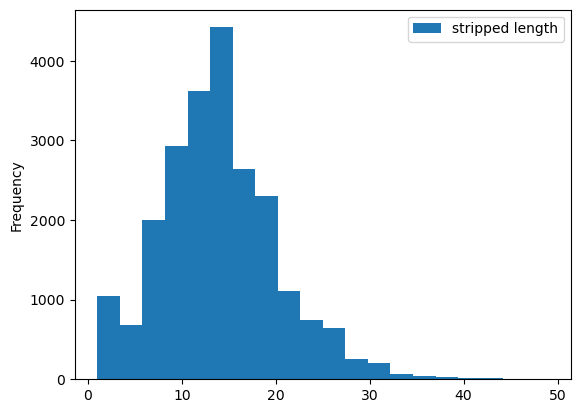

In [31]:
# histogram of stripped peptide lengths

plt.rcdefaults()
#fig, ax = plt.subplots()

comet.plot(y='stripped length', kind = 'hist', bins = 20)
ax.set_xlabel('stripped peptide length')
plt

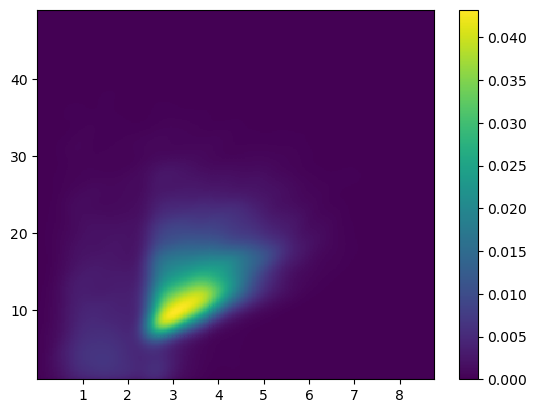

In [29]:
# density plot of xcorr vs length (idea from https://python-graph-gallery.com/85-density-plot-with-matplotlib/)

# read in data
x = comet['xcorr']
y = comet['stripped length']
 
# evaluate a gaussian kernel density estimation (KDE) on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.colorbar()
plt.show() 

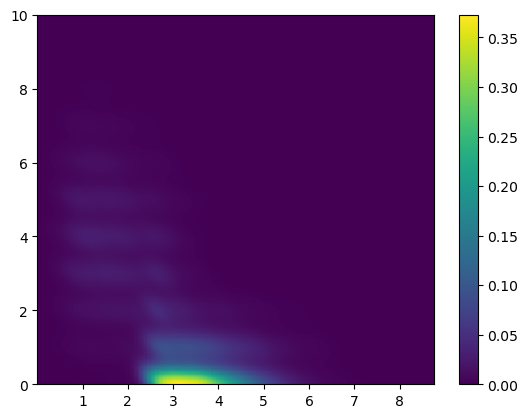

In [30]:
# density plot of xcorr vs total # of PTMs (idea from https://python-graph-gallery.com/85-density-plot-with-matplotlib/)

# read in data
x = comet['xcorr']
y = comet['ptm-total']
 
# evaluate a gaussian kernel density estimation (KDE) on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.colorbar()
plt.show() 

In [ ]:
# optional: removing duplicates
pd.DataFrame.drop_duplicates(comet)

Now doing the same manipulation for the duplicate MED2_trypsin injection Comet output:

In [ ]:
#read the CSV into a datadrame we name 'comet' using the pandas read_csv function
comet = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL4_MED2_trypsin_2_PTMopt_Comet.csv")


#look at the dataframe
comet.head()

In [ ]:
# use str.strip with indexing by str[0] to add a column with the peptide's left terminus
comet['L terminus'] = comet['peptide'].astype(str).str[0]

# use str.strip with indexing by str[-1] to add a column with the peptide's left terminus
comet['R terminus'] = comet['peptide'].str.strip().str[-1]

# use a count function to enumerate the # of ccarbamidomethylated C's in each peptide
comet['c-carb'] = comet['peptide'].str.count("160.03")

# use a count function to enumerate the # of oxidized M's in each peptide
comet['m-oxid'] = comet['peptide'].str.count("147.04")

# use a count function to enumerate the # of deamidated N's in each peptide
comet['n-deam'] = comet['peptide'].str.count("115.03")

# use a count function to enumerate the # of deamidated Q's in each peptide
comet['q-deam'] = comet['peptide'].str.count("129.04")

# use a count function to enumerate the # of iron adducted K's in each peptide
comet['k-iron'] = comet['peptide'].str.count("182.11")

# use a count function to enumerate the # of methylated K's in each peptide
comet['k-meth'] = comet['peptide'].str.count("142.11")

# use a count function to enumerate the # of methylated R's in each peptide
comet['r-meth'] = comet['peptide'].str.count("170.12")

# create a column with 'stripped' peptide sequences using strip
comet['stripped peptide'] = comet['peptide'].str[2:].str[:-2].str.replace(r"\[.*\]","")

# add a column with the stripped peptide length (number of AAs)
comet['stripped length'] = comet['stripped peptide'].apply(len)

# write modified dataframe to new txt file, same name + 'stripped'
comet.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL4_MED2_trypsin_2_PTMopt_Comet_stripped.csv")


# check out the results
comet.head()

Now we should have two stripped peptide csvs in the directory:

In [ ]:
ls /home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/